In [1]:
import requests as rs
import pandas as pd
import seaborn as sns

In [2]:
# url = "https://api.nal.usda.gov/fdc/v1/foods/list?&pageSize=194&pageNumber=51&api_key=7huFqm7LkUN5o0b6PHEabJdwkgoh4vzTDOP9GOBp"

In [3]:
# req = rs.get(url)

In [4]:
#print(req)

In [5]:
# req = req.json()

In [6]:
# print(req)

In [7]:
# x = req[0]
# y = len(req)
# print(y)

In [8]:
def requestAllFood ():
    pageNum = 1
    foods = []
    while True:
        url = "https://api.nal.usda.gov/fdc/v1/foods/list?&pageSize=200&api_key=7huFqm7LkUN5o0b6PHEabJdwkgoh4vzTDOP9GOBp&pageNumber=" + str(pageNum)
        req = rs.get(url)
        if not req.ok:
            break
        foods = foods + req.json()
        pageNum = pageNum + 1
    return foods

In [9]:
listOfFoods = requestAllFood()

In [10]:
print(len(listOfFoods))

10000


In [11]:
print(listOfFoods[-1])

{'fdcId': 169158, 'description': 'Pork, cured, ham, slice, bone-in, separable lean only, heated, pan-broil', 'dataType': 'SR Legacy', 'publicationDate': '2019-04-01', 'ndbNumber': '10899', 'foodNutrients': [{'number': '204', 'name': 'Total lipid (fat)', 'amount': 4.09, 'unitName': 'G', 'derivationCode': 'A', 'derivationDescription': 'Analytical'}, {'number': '210', 'name': 'Sucrose', 'amount': 0.63, 'unitName': 'G', 'derivationCode': 'A', 'derivationDescription': 'Analytical'}, {'number': '211', 'name': 'Glucose', 'amount': 0.11, 'unitName': 'G', 'derivationCode': 'A', 'derivationDescription': 'Analytical'}, {'number': '214', 'name': 'Maltose', 'amount': 0.0, 'unitName': 'G', 'derivationCode': 'A', 'derivationDescription': 'Analytical'}, {'number': '255', 'name': 'Water', 'amount': 65.3, 'unitName': 'G', 'derivationCode': 'A', 'derivationDescription': 'Analytical'}, {'number': '262', 'name': 'Caffeine', 'amount': 0.0, 'unitName': 'MG', 'derivationCode': 'Z', 'derivationDescription': 'A

In [12]:
def createList ():
    iron = []
    for food in listOfFoods:
        name = food["description"]
        for nutrient in food["foodNutrients"]:
            if nutrient["name"] == "Iron, Fe":
                amount = nutrient["amount"]
                temp = {"Name": name, "Iron": amount}
                iron.append(temp) 
    return iron

In [13]:
listOfFoods = createList()

In [14]:
df = pd.DataFrame(listOfFoods)

In [15]:
df.head()

,Name,Iron
0,Abalone,3.97
1,"Abiyuch, raw",1.61
2,"Acerola juice, raw",0.50
3,"Acerola, (west indian cherry), raw",0.20
4,Acorn stew (Apache),1.00


In [16]:
def removeBabyFood(df):
    index = 0
    for name in df["Name"]:
        if "Baby" in name:
            df.drop(index, inplace = True)
        index = index + 1

In [17]:
removeBabyFood(df)

In [18]:
top = df.sort_values(by="Iron", ascending = False)

In [19]:
top10 = top[:10]

In [20]:
top10

,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
8976,"Parsley, freeze-dried",53.9
3451,"Cereals, QUAKER, Quick Oats with Iron, Dry",49.4
3248,"Cereal, O's, multigrain",46.6
1961,"Beef, variety meats and by-products, spleen, raw",44.6
3401,"Cereals, MALT-O-MEAL, chocolate, dry",42.9
3426,"Cereals, QUAKER, Instant Grits, Redeye Gravy &...",42.0
7711,"Lamb, variety meats and by-products, spleen, raw",41.9
3297,"Cereals ready-to-eat, MALT-O-MEAL, OAT BLENDER...",41.4
3403,"Cereals, MALT-O-MEAL, Farina Hot Wheat Cereal,...",40.9


<AxesSubplot:xlabel='Iron', ylabel='Name'>

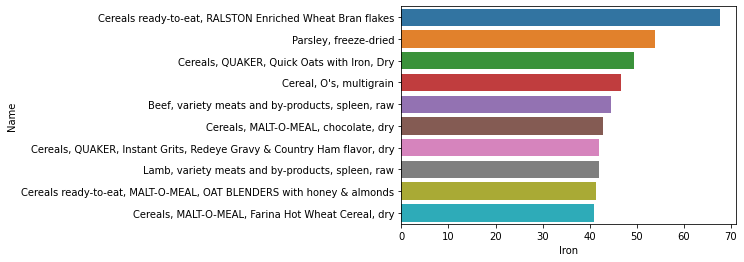

In [21]:
sns.barplot(data = top10, x = "Iron", y = "Name")

<AxesSubplot:xlabel='Iron', ylabel='Count'>

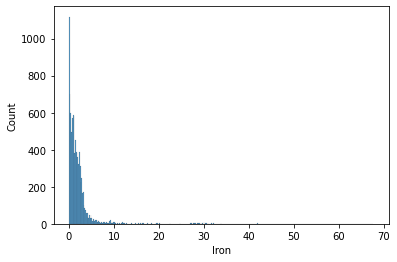

In [22]:
sns.histplot(df["Iron"])

In [23]:
df["Iron"].quantile(0.999999999999)

67.69999986786279